# WEB SCRAPING - REAL ESTATE WEBSITE: PARARIUS

In this I'm trying to scrape the details of rental properties of Amsterdam listed in pararius website and saving it as an excel file

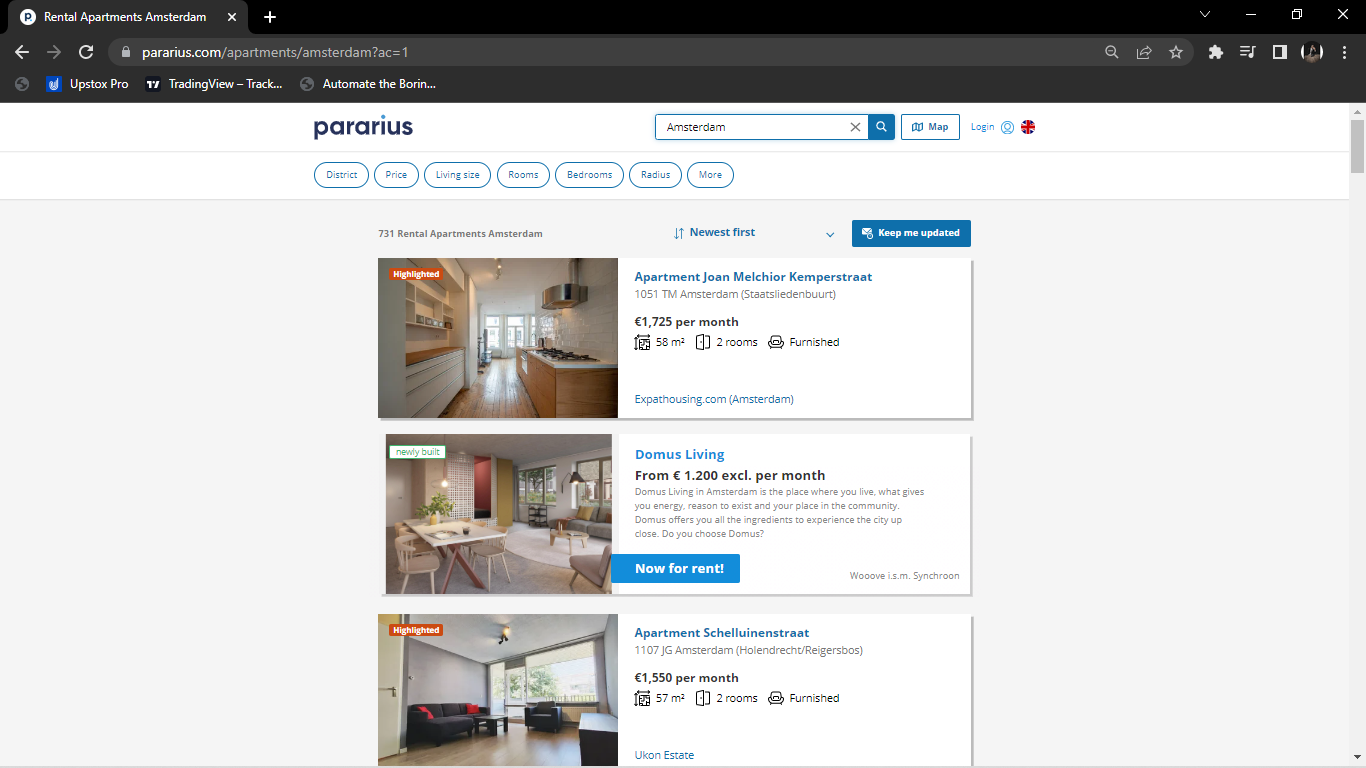

#### IMPORT LIBRARIES

In [2]:
from bs4 import BeautifulSoup
import requests

In [65]:
import openpyxl
excel = openpyxl.Workbook()
sheet = excel.active
sheet.title = 'Real Estate -- Amsterdam'

sheet.append(['title','location','price','surface_area','rooms'])

In [51]:
url = "https://www.pararius.com/apartments/amsterdam"

In [52]:
page = requests.get(url) # accessing the webpage

In [53]:
soup = BeautifulSoup(page.content,'html.parser') # getting the content of the page and using html parser to parser the contents

In [54]:
lists = soup.find_all('section',class_='listing-search-item--list') # saving the section to a list, since title,location, etc are in this section.[parent tag]

In [72]:
# extracting the required details from the list that we created.
for lst in lists:
    title = lst.find('a',class_='listing-search-item__link--title').text
    location = lst.find('div',class_='listing-search-item__location').text.replace('\n','').strip()
    price = lst.find('div',class_='listing-search-item__price').text.replace('\n','').strip()
    surface_area = lst.find('li',class_='illustrated-features__item--surface-area').text.replace('\n','').strip()
    rooms = lst.find('li',class_='illustrated-features__item--number-of-rooms').text.replace('\n','').strip()
    info = [title,location,price,surface_area,rooms]
    
    sheet.append([title,location,price,surface_area,rooms]) # appending the details to the excel worksheet
    
excel.save('Real Estate.xlsx')  # saving the excel file